# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# your code here
exch_rates  =  pd.read_csv('exch_rates.csv')
exch_rates.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [3]:
exch_rates['Frequency'] = pd.to_datetime(exch_rates['Frequency'])
exch_rates.set_index('Frequency', inplace=True)
exch_rates.columns = [ 'EUR', 'AUD','DKK']
exch_rates.head()

,EUR,AUD,DKK
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


In [4]:
exch_rates.dropna(inplace=True)
exch_rates.head()

,EUR,AUD,DKK
Frequency,,,
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170
2000-01-06,0.962649,1.523681,7.166057
2000-01-07,0.972384,1.530338,7.238040


Plot the three exchange rates in one plot

Text(0.5,0,'Date')

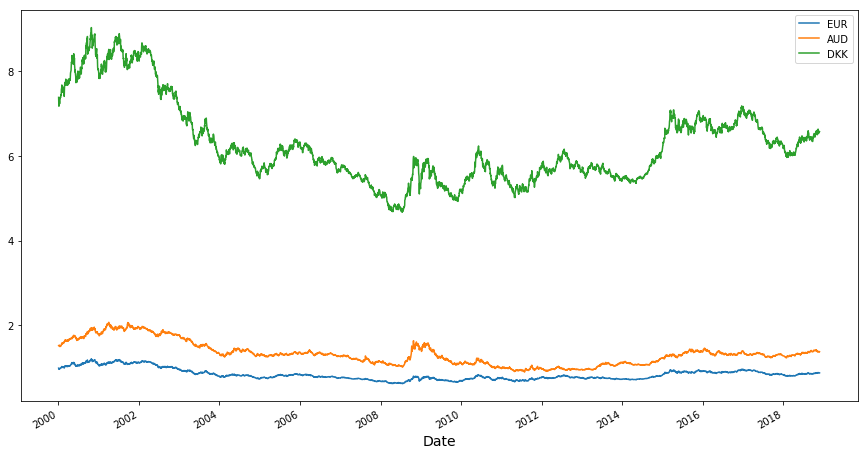

In [5]:
# your code here
exch_rates.plot(figsize=(15,8))
plt.xlabel('Date', fontsize=14)

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [6]:
# your code here
exch_rates.corr()

,EUR,AUD,DKK
EUR,1.000000,0.883181,0.999952
AUD,0.883181,1.000000,0.882513
DKK,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

AUD is highly correlated.  EUR and DKK are near perfect because DKK is pegged to the EUR

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [7]:
# your code here
exch_diff = exch_rates.diff(periods=1)

In [ ]:
# your code here

Text(0.5,0,'Date')

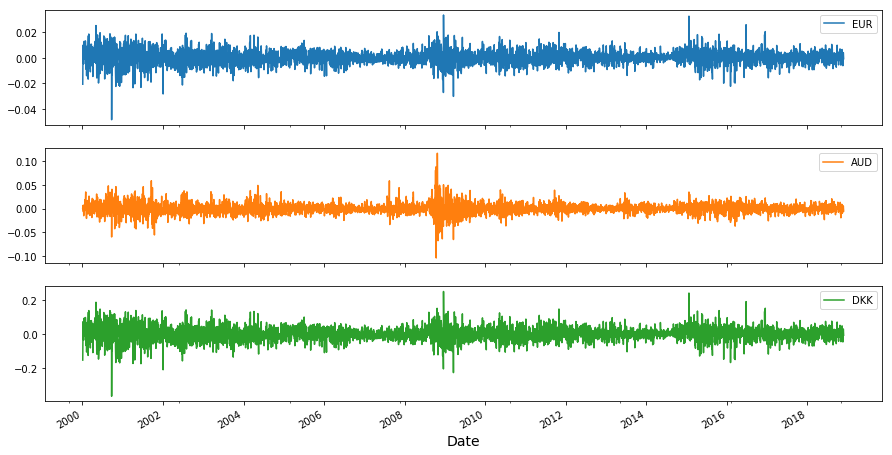

In [8]:
# your code here
exch_diff.plot(subplots = True, figsize=(15,8))
plt.xlabel('Date', fontsize=14)

### Explain what's going on

Differencing the series here led to a decrease in correlation between the EUR/USD and AUD/USD series. If you think a little further, this makes sense: in the lecture before, the high correlation was a result of seasonality. Differencing led to an increase in correlation between series, here the series are moving in the (more or less) same direction on a day-to-day basis and seasonality is not present, hence this result

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [9]:
# your code here
eur_usd= exch_diff['EUR']
eur_usd.head()

Frequency
2000-01-03         NaN
2000-01-04   -0.020677
2000-01-05   -0.005897
2000-01-06   -0.001857
2000-01-07    0.009735
Name: EUR, dtype: float64

In [10]:
# your code here
e_u_shift1 = eur_usd.shift(periods=1)
lag_1= pd.concat([e_u_shift1, eur_usd], axis=1)
lag_1.corr()

,EUR,EUR
EUR,1.000000,-0.007999
EUR,-0.007999,1.000000


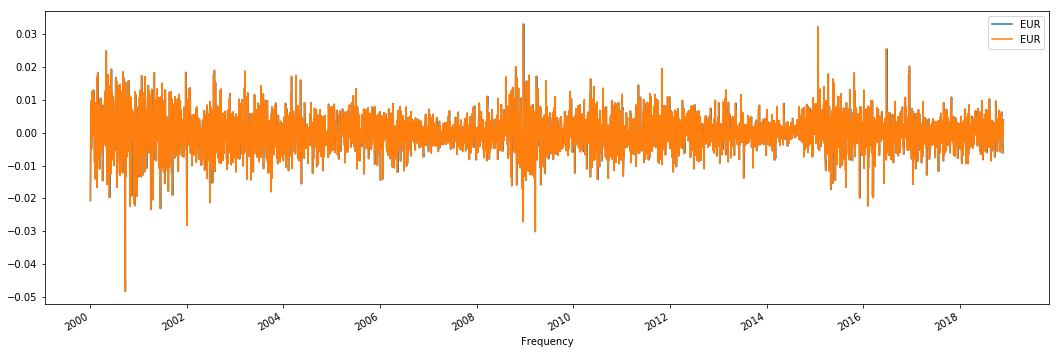

In [11]:
# your code here
lag_1.plot(figsize=(18,6))

Repeat this, but for a "lag 5 autocorrelation"

In [12]:
# your code here
e_u_shift5 = eur_usd.shift(periods=5)
lag_5= pd.concat([e_u_shift5, eur_usd], axis=1)
lag_5.corr()

,EUR,EUR
EUR,1.000000,-0.003072
EUR,-0.003072,1.000000


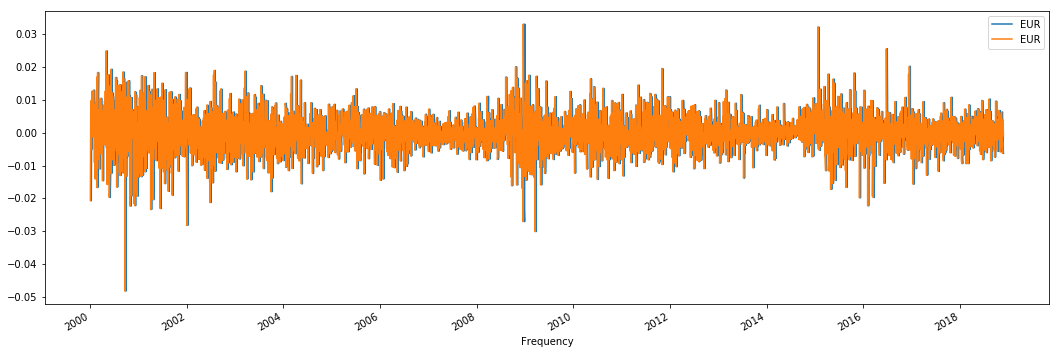

In [13]:
# your code here
lag_5.plot(figsize=(18,6))

### What's your conclusion here?

Autocorrelation is very high in these time series, even up to a lag as big as 50! This is no big surprise though: remember that these are random walk series, which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

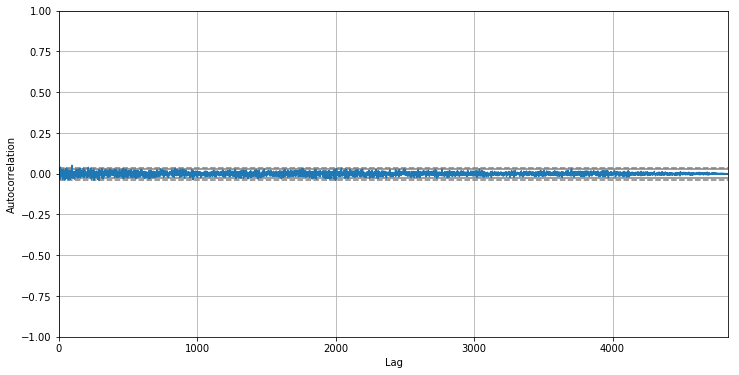

In [22]:
eur_usd.dropna(inplace=True)
plt.figure(figsize=(12,6))
pd.plotting.autocorrelation_plot(eur_usd)

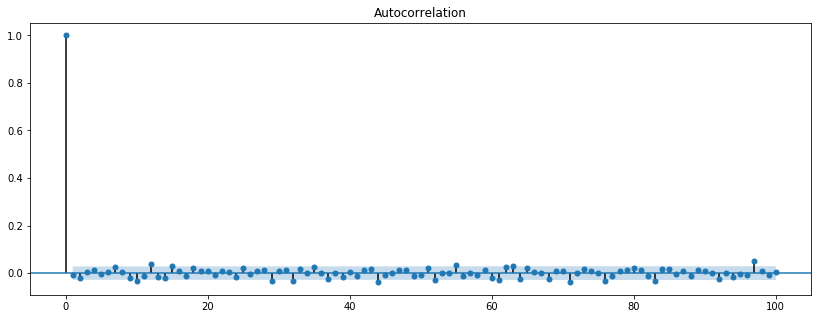

In [20]:
# your code here
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(eur_usd, lags = 100);

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

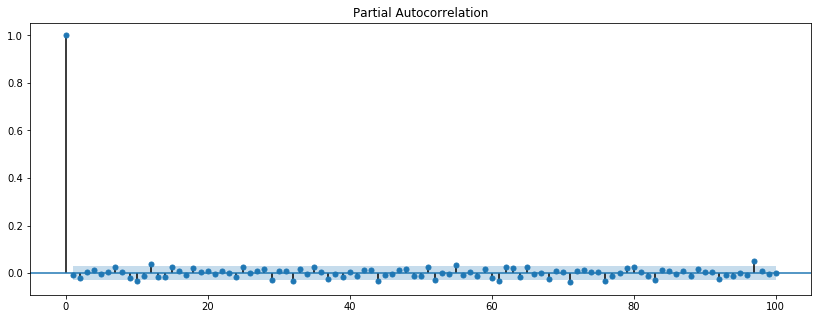

In [21]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(eur_usd, lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [23]:
# your code here
air = pd.read_csv('passengers.csv')
air.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [25]:
# your code here
air.Month= pd.to_datetime(air.Month)
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
# your code here
air_diff = air.diff(periods=1)
air_diff.dropna(inplace=True)

Text(0.5,1,'ACF Regular')

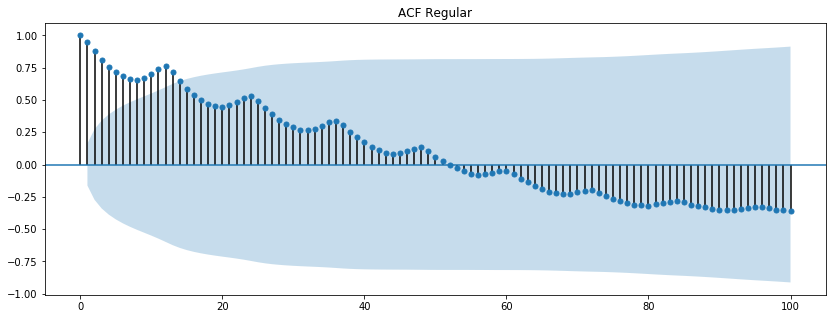

In [33]:
# your code here
plot_acf(air, lags = 100);
plt.title("ACF Regular")

Text(0.5,1,'ACF Differenced')

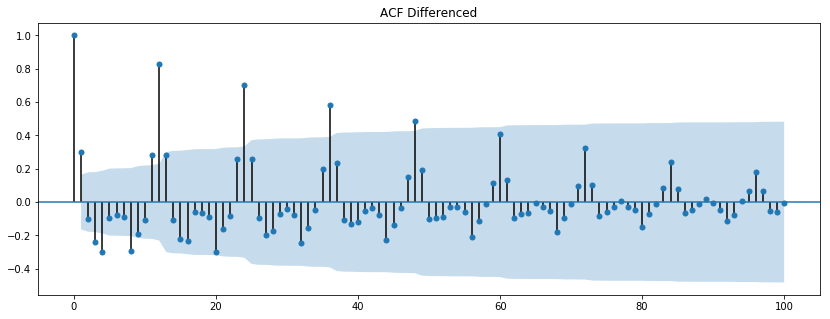

In [34]:
# your code here
plot_acf(air_diff, lags = 100);
plt.title("ACF Differenced")

C:\Users\sardi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5,1,'PACF Regular')

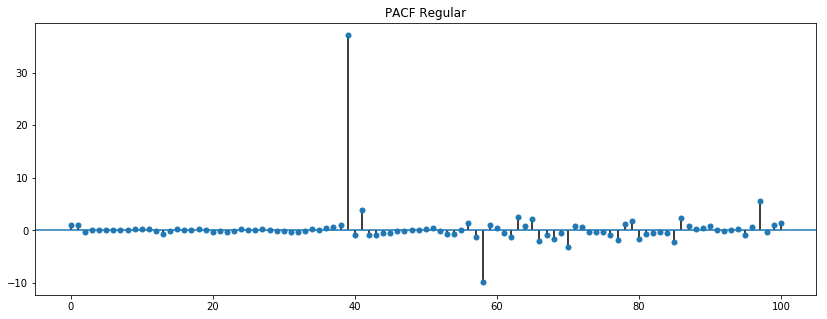

In [35]:
# your code here
# your code here
plot_pacf(air, lags = 100);
plt.title("PACF Regular")

C:\Users\sardi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5,1,'PACF Differenced')

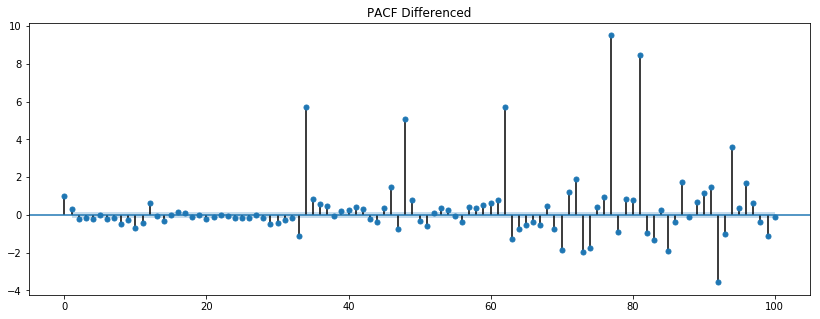

In [36]:
# your code here
plot_pacf(air_diff, lags = 100);
plt.title("PACF Differenced")

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [37]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [38]:
# your code here
nyse.Month= pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


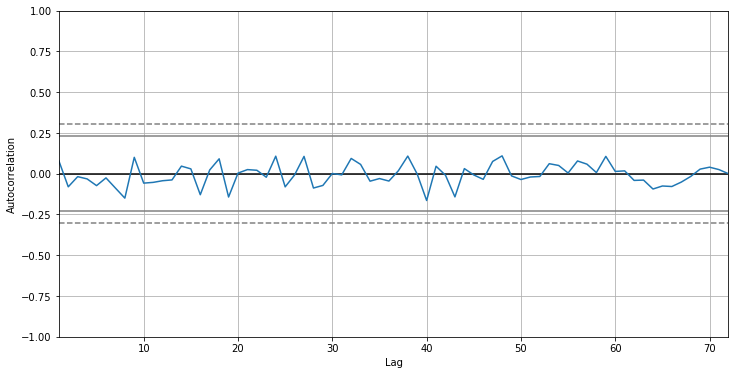

In [42]:
nyse.dropna(inplace=True)
plt.figure(figsize=(12,6))
pd.plotting.autocorrelation_plot(nyse)

C:\Users\sardi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\sardi\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


Text(0.5,1,'PACF')

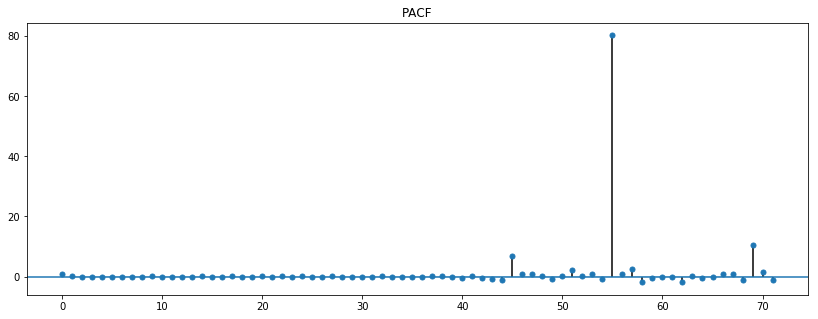

In [43]:
# your code here
plot_pacf(nyse, lags = 100);
plt.title("PACF")

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!